# Distance Matrix

In [2]:
# imports
from sklearn import datasets
import numpy as np

In [3]:
# abstract
dataset = datasets.load_iris()

In [4]:
# dictionary
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
data = dataset["data"]
# data  # data is a numpy array data structure. Think of it as a matrix of data (or as an excel spreadsheet)

In [7]:
data.shape

(150, 4)

In [8]:
# euclidean distance of 2 observations
(sum((data[0]-data[1])**2))**(1/2)

0.5385164807134502

In [9]:
# initialize distance matrix. What will be its final shape?
dist = []

In [10]:
# Build the distance matrix. Use 2 for loops, the append list method and the euclidean distance formula
for row1 in data:
    row = []
    for row2 in data:
        row.append((sum((row1-row2)**2))**(1/2))
    dist.append(row)

In [11]:
np.array(dist).shape

(150, 150)

In [12]:
# another import (usually all imports are done at the top of the script/ notebook)
import seaborn as sns

<AxesSubplot:>

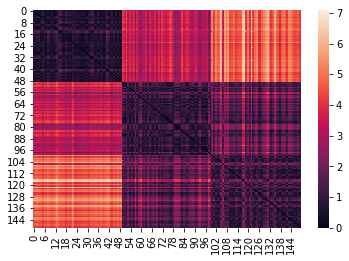

In [13]:
sns.heatmap(dist)

# Plotting data: 
Don't worry about the code as that's not the objective of the exercise and we will learn how to plot data in future classes
### How can we represent an observation in a N-dimensional Space

In [14]:
# another import (usually all imports are done at the top of the script/ notebook)
import matplotlib.pyplot as plt

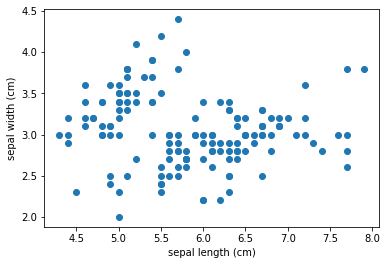

In [15]:
# 2D scatter plot
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(dataset["feature_names"][0])
plt.ylabel(dataset["feature_names"][1])
plt.show()

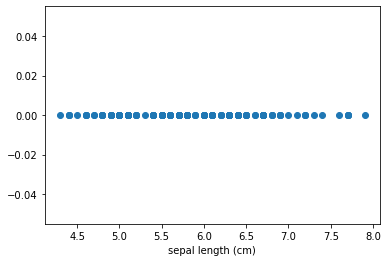

In [16]:
# 1D scatter plot
plt.scatter(data[:, 0], [0 for i in range(data.shape[0])])
plt.xlabel(dataset["feature_names"][0])
plt.show()

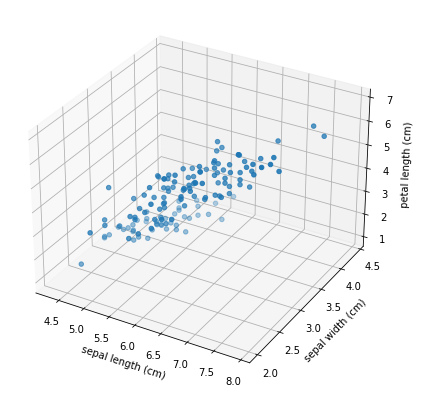

In [17]:
# 3D scatter plot
fig = plt.figure(figsize=(14, 7))  # defining a figure so we can add a 3d subplot
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
ax.set_xlabel(dataset["feature_names"][0])
ax.set_ylabel(dataset["feature_names"][1])
ax.set_zlabel(dataset["feature_names"][2])
plt.show()

## Finding nearest neighbors

In [37]:
# get variables to save closest neighbors later
min_args, min_dist = (None, 9e99)

for id_r , row in enumerate(dist):
    row_relevant = row[:id_r]
    
    if len(row_relevant) == 0:
        continue
    else:
        dist_ = min(row_relevant)
    
    if dist_ < min_dist:
        
        min_dist = dist_
        
        for id_c, row_value in enumerate(row_relevant):
            
            if row_value == min_dist:
                min_args = (id_r, id_c)
                



In [38]:
print(min_dist)
print(min_args)

0.0
(142, 101)


In [33]:
print(data[min_args[0]])
print(data[min_args[1]])
print('minimum distance:\t', min_dist)

[5.8 2.7 5.1 1.9]
[5.8 2.7 5.1 1.9]
minimum distance:	 0.0


## Define functions
Why do we want to define functions in this case?

In [40]:
def distance_matrix(data):
    dist = []
    
    for row1 in data:
    row = []
    
    for row2 in data:
        row.append((sum((row1-row2)**2))**(1/2))
    
    dist.append(row)
    return dist    

def closest_points(dist_matrix):
    min_args, min_dist = (None, 9e99)

    for id_r , row in enumerate(dist):
        row_relevant = row[:id_r]

        if len(row_relevant) == 0:
            continue
        else:
            dist_ = min(row_relevant)

        if dist_ < min_dist:

            min_dist = dist_

            for id_c, row_value in enumerate(row_relevant):

                if row_value == min_dist:
                    min_args = (id_r, id_c)
    
    return min_args, min_dist

IndentationError: expected an indented block (<ipython-input-40-cedea67d3831>, line 5)

## Finding the `n` shortest distances

In [39]:
dist_matrix = distance_matrix(data)
n_distances = 10

for i in range(n_distances):
    results = closest_points(dist_matrix)
    dist_matrix[results[0][0]][results[0][1]] = 9e99
    distances.appende(results)

distances

NameError: name 'distance_matrix' is not defined